In [1]:
#!pip install -U transformers
#!pip install -U datasets
import os
import sys
HOME = os.path.abspath('..')
sys.path.append(HOME)
os.chdir(HOME)
import pandas as pd
#!pip install transformers
from transformers import RobertaConfig, RobertaModel,RobertaForSequenceClassification, Trainer,AutoModelForSequenceClassification, EarlyStoppingCallback 
from transformers import AutoTokenizer
from transformers.models.roberta import RobertaPreTrainedModel
import torch
from torch import nn
from transformers import TrainingArguments
import shutil
import glob

In [ ]:
trainer.train()

loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "regression",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.17.0",
  "vocab_size": 30522
}

loading weights file https://huggingface.co/distilbert

Step,Training Loss,Validation Loss
100,No log,1.442023
200,No log,1.399222
300,No log,1.089085
400,No log,0.956043
500,1.694500,1.066266
600,1.694500,1.283469
700,1.694500,0.830654
800,1.694500,0.844380
900,1.694500,0.861464
1000,0.704100,0.887585


***** Running Evaluation *****
  Num examples = 1754
  Batch size = 16
Saving model checkpoint to distilbert-base-uncased-averageRating/checkpoint-100
Configuration saved in distilbert-base-uncased-averageRating/checkpoint-100/config.json
Model weights saved in distilbert-base-uncased-averageRating/checkpoint-100/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1754
  Batch size = 16
Saving model checkpoint to distilbert-base-uncased-averageRating/checkpoint-200
Configuration saved in distilbert-base-uncased-averageRating/checkpoint-200/config.json
Model weights saved in distilbert-base-uncased-averageRating/checkpoint-200/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1754
  Batch size = 16
Saving model checkpoint to distilbert-base-uncased-averageRating/checkpoint-300
Configuration saved in distilbert-base-uncased-averageRating/checkpoint-300/config.json
Model weights saved in distilbert-base-uncased-averageRating/checkpoint-300/pytorch_model.bin
*

In [ ]:
trainer.evaluate()

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("mse")

def compute_metrics(eval_pred,metric):
    logits, labels = eval_pred
    predictions = logits
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
preds = trainer.predict(test_dataset)

In [ ]:
eval_preds = [preds.predictions,preds.label_ids]
compute_metrics(eval_preds,metric)

In [ ]:
y_bar = preds.label_ids.mean()
eval_preds = [preds.predictions,preds.label_ids]

1-compute_metrics(eval_preds,metric)['mse']/((preds.label_ids-y_bar)**2).mean()

In [ ]:
preds.predictions.max(),preds.predictions.min()

In [ ]:
sum((preds.label_ids>=4.17)&(preds.label_ids<=7.92))/len(preds.label_ids)

In [ ]:

'''
from itertools import product

hparams = {'learning_rate' : [1e-5, 2e-5, 3e-5],
           'weight_decay' : [0.1,0.01],
           'repeats': range(1)}

combs = list(product(*[range(len(i)) for i in list(hparams.values())]))
scores = np.zeros([len(i) for i in list(hparams.values())])


for comb_indexes in combs:
    comb_values = {name:val[idx] for name,val,idx in zip(hparams.keys(),hparams.values(),comb_indexes)}
    score = 1
    scores[tuple(comb_indexes)] = score

   ''' 

In [9]:
from itertools import product
import numpy as np

epochs = 10
num_evals = 20
patience = 2 
eval_steps = 50 

hparams = {'batch_size' : [8,16,32],
           'learning_rate' : [1e-5, 2e-5, 3e-5,5e-5],
           'weight_decay' : [0.1,0.01],
           'repeats': range(1)}

combs = list(product(*[range(len(i)) for i in list(hparams.values())]))
scores = np.zeros([len(i) for i in list(hparams.values())])
best_score = float('inf')

for idx,comb_indexes in enumerate(combs):
    comb_values = {name:val[idx] for name,val,idx in zip(hparams.keys(),hparams.values(),comb_indexes)}
    print(comb_values)

{'batch_size': 8, 'learning_rate': 1e-05, 'weight_decay': 0.1, 'repeats': 0}
{'batch_size': 8, 'learning_rate': 1e-05, 'weight_decay': 0.01, 'repeats': 0}
{'batch_size': 8, 'learning_rate': 2e-05, 'weight_decay': 0.1, 'repeats': 0}
{'batch_size': 8, 'learning_rate': 2e-05, 'weight_decay': 0.01, 'repeats': 0}
{'batch_size': 8, 'learning_rate': 3e-05, 'weight_decay': 0.1, 'repeats': 0}
{'batch_size': 8, 'learning_rate': 3e-05, 'weight_decay': 0.01, 'repeats': 0}
{'batch_size': 8, 'learning_rate': 5e-05, 'weight_decay': 0.1, 'repeats': 0}
{'batch_size': 8, 'learning_rate': 5e-05, 'weight_decay': 0.01, 'repeats': 0}
{'batch_size': 16, 'learning_rate': 1e-05, 'weight_decay': 0.1, 'repeats': 0}
{'batch_size': 16, 'learning_rate': 1e-05, 'weight_decay': 0.01, 'repeats': 0}
{'batch_size': 16, 'learning_rate': 2e-05, 'weight_decay': 0.1, 'repeats': 0}
{'batch_size': 16, 'learning_rate': 2e-05, 'weight_decay': 0.01, 'repeats': 0}
{'batch_size': 16, 'learning_rate': 3e-05, 'weight_decay': 0.1, 'r

In [16]:
scores_avg = scores.mean(axis=-1)

In [22]:
import pandas as pd

In [23]:
pd.DataFrame([comb_values,comb_values])

,batch_size,learning_rate,weight_decay,repeats
0,32,0.00005,0.01,0
1,32,0.00005,0.01,0


In [2]:
trials_df = pd.read_csv('models/only_text_features/hparams_trials.csv')

<AxesSubplot:xlabel='batch_size', ylabel='score'>

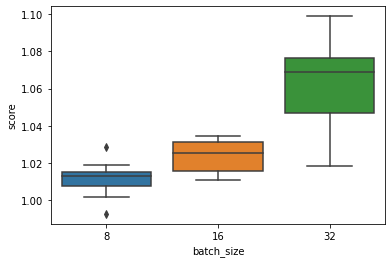

In [4]:
import seaborn as sns
sns.boxplot(data = trials_df,x = 'batch_size',y='score')

<AxesSubplot:xlabel='weight_decay', ylabel='score'>

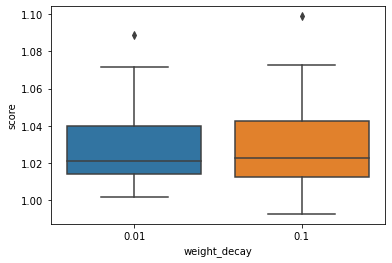

In [7]:
sns.boxplot(data = trials_df,x = 'weight_decay',y='score')

In [8]:
trials_df

,batch_size,learning_rate,weight_decay,repeats,score
0,8,0.00001,0.10,0,1.009404
1,8,0.00001,0.01,0,1.014230
2,8,0.00002,0.10,0,1.012284
3,8,0.00002,0.01,0,1.013461
4,8,0.00003,0.10,0,0.992761
5,8,0.00003,0.01,0,1.001895
6,8,0.00005,0.10,0,1.028762
7,8,0.00005,0.01,0,1.018818
8,16,0.00001,0.10,0,1.012921
9,16,0.00001,0.01,0,1.011110


In [44]:
((val['averageRating']-val['averageRating'].mean())**2).mean()

1.2757810718358051

In [50]:
1-0.5/1.27

0.6062992125984252

In [51]:
((test['averageRating']-test['averageRating'].mean())**2).mean()

1.1645053430568955

In [54]:
1-0.4/1.16

0.6551724137931034

In [ ]:
    
    
    
#Test set performance
best_model = get_model_by_name(f'models/{MODEL_FOLDER}/{FINAL_MODEL_NAME}/')
trainer_best_model = Trainer(model=best_model)
test_stats_best_model = trainer_best_model.evaluate(test_dataset)
pd.DataFrame([test_stats_best_model]).to_csv(f'models/{MODEL_FOLDER}/test_stats_best_model.csv'
                                             ,index=False)

'''
    
training_args = TrainingArguments(output_dir=f"{MODEL_NAME}-{TARGET_COL}",
                                  seed = 42,
                                  fp16=True,
                                  per_device_eval_batch_size = 16,
                                  warmup_ratio=0.06,
                                  num_train_epochs = epochs,
                                  evaluation_strategy = "steps",
                                  save_strategy = "steps",
                                  load_best_model_at_end=True,
                                  eval_steps = eval_steps,
                                  save_steps = eval_steps,
                                  save_total_limit = 3
                                 )

trainer = Trainer(
    model_init=get_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    callbacks = callbacks
)


#Grid search
search_space = {'learning_rate' : [1e-5, 2e-5, 3e-5, 5e-5],
                'weight_decay' : [0.1,0.01],
                'per_device_train_batch_size' : [32,16,8]
               }




def hyperparameter_space(trial):

    return {
        "learning_rate": trial.suggest_categorical("learning_rate",search_space["learning_rate"]),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", search_space["per_device_train_batch_size"]),
        "weight_decay": trial.suggest_categorical("weight_decay", search_space["weight_decay"])
    }


best_run = trainer.hyperparameter_search(hp_space=hyperparameter_space,
                                         n_trials=None,
                                         sampler = optuna.samplers.GridSampler(search_space),
                                         study_name = 'imdb_rating_finetune',
                                         direction='minimize',
                                         pruner=optuna.pruners.PatientPruner(None,patience=patience)
                                        )
'''